In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Döviz Kuru

In [2]:
series ="TP.DK.USD.S.YTL"
series_name="Dolar_Kuru"
startDate= "01-03-2020"
endDate="09-05-2020"
typee="csv"
key=""
aggregationTypes="avg"
formulas="0"
frequency = "2"
url= 'https://evds2.tcmb.gov.tr/service/evds/series={}&startDate={}&endDate={}&type={}&key={}&aggregationTypes={}&formulas={}&frequency={}'.format(series,startDate,endDate,typee,key,aggregationTypes,formulas,frequency)

dolar = pd.read_csv(url)
dolar.head()

,Tarih,TP_DK_USD_S_YTL,UNIXTIME
0,02-03-2020,6.2371,"{""numberLong"":""1583103600""}"
1,03-03-2020,6.2304,"{""numberLong"":""1583190000""}"
2,04-03-2020,6.2055,"{""numberLong"":""1583276400""}"
3,05-03-2020,6.1014,"{""numberLong"":""1583362800""}"
4,06-03-2020,6.0882,"{""numberLong"":""1583449200""}"


In [3]:
dolar.drop("UNIXTIME", axis=1,inplace=True)
dolar.set_index("Tarih",inplace=True)
dolar.rename(columns={series.replace(".","_"):series_name},inplace=True)
dolar.dropna(how="any",inplace=True) 
dolar=round(dolar,2)
dolar.head()

,Dolar_Kuru
Tarih,
02-03-2020,6.24
03-03-2020,6.23
04-03-2020,6.21
05-03-2020,6.10
06-03-2020,6.09


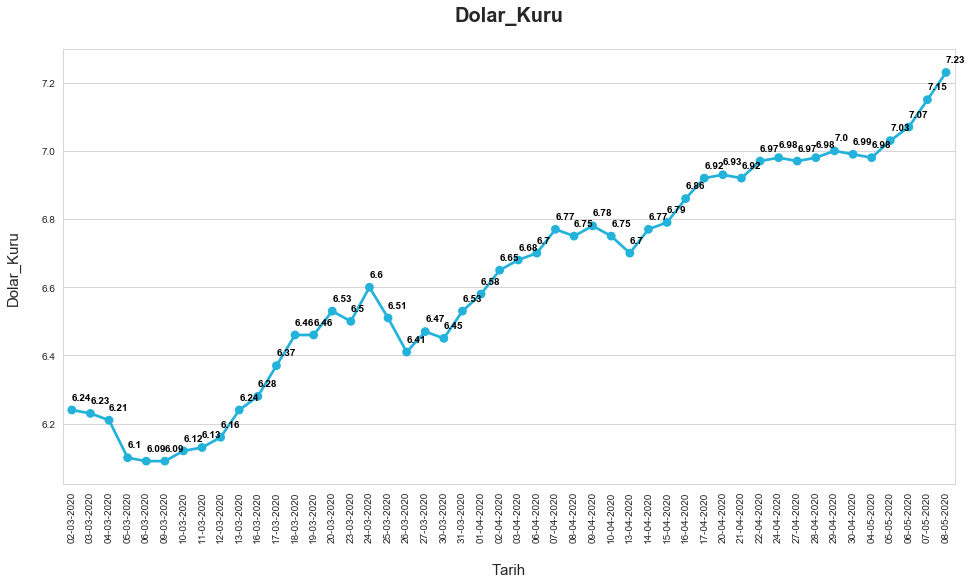

In [4]:
# Görselleştirme
#Grafiğimizin Boyutu
plt.figure(figsize=(16,8))

#çizimi
sns.set_style("whitegrid")
p1 = sns.pointplot(x=dolar.index,
              y=dolar[series_name],
              color='#22b2da',
              alpha=0.5)
#grafik üzerine değerlerin yazılması
for line in range(0,dolar.shape[0]):
     p1.text(line, dolar[series_name].iloc[line]+0.03, dolar[series_name].iloc[line], 
             horizontalalignment='left', size='medium', color='black', weight='semibold')

#x eksenimizdeki yazıları 90 derece açıyla yazdırdık.
plt.xticks(rotation= 90)

# x ve y eksenimizi isimlendirdik.
plt.xlabel('\nTarih',fontsize = 15)
plt.ylabel(series_name+"\n",fontsize = 15)

#Grafiğe isim verdik.
plt.title(series_name+"\n",fontsize = 20, weight='semibold')

#Oluşturduğumuz grafiği kaydettik.
resimadi= "Dolar Kuru.png".format(series_name, dolar.iloc[dolar.shape[0]-1].name)
plt.savefig(resimadi,dpi=200)
plt.show()


In [5]:
from warnings import filterwarnings
filterwarnings('ignore')
import tweepy, codecs


consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


tweet ="Dolar Kurundaki Değişim" 
image_path ="Dolar Kuru.png" 
  
status = api.update_with_media(image_path, tweet)  

# Euro Kuru

In [6]:
series ="TP.DK.EUR.S.YTL"
series_name="Euro_Kuru"
startDate= "01-03-2020"
endDate="09-05-2020"
typee="csv"
key=""
aggregationTypes="avg"
formulas="0"
frequency = "2"
url= 'https://evds2.tcmb.gov.tr/service/evds/series={}&startDate={}&endDate={}&type={}&key={}&aggregationTypes={}&formulas={}&frequency={}'.format(series,startDate,endDate,typee,key,aggregationTypes,formulas,frequency)
euro = pd.read_csv(url)
euro.head()

,Tarih,TP_DK_EUR_S_YTL,UNIXTIME
0,02-03-2020,6.8716,"{""numberLong"":""1583103600""}"
1,03-03-2020,6.9027,"{""numberLong"":""1583190000""}"
2,04-03-2020,6.9013,"{""numberLong"":""1583276400""}"
3,05-03-2020,6.8049,"{""numberLong"":""1583362800""}"
4,06-03-2020,6.7902,"{""numberLong"":""1583449200""}"


In [7]:
euro.drop("UNIXTIME", axis=1,inplace=True)
euro.set_index("Tarih",inplace=True)
euro.rename(columns={series.replace(".","_"):series_name},inplace=True)
euro.dropna(how="any",inplace=True) 
euro=round(euro,1)
euro.head()

,Euro_Kuru
Tarih,
02-03-2020,6.9
03-03-2020,6.9
04-03-2020,6.9
05-03-2020,6.8
06-03-2020,6.8


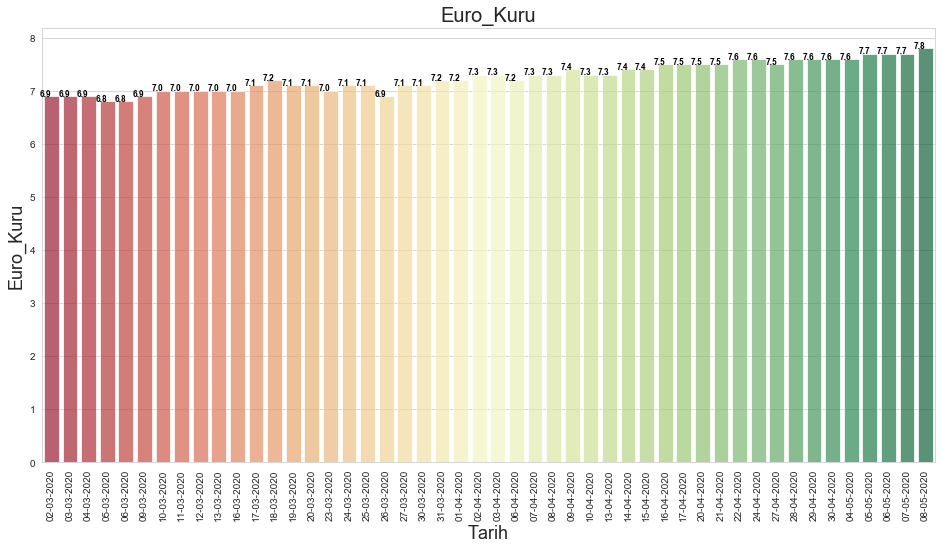

In [8]:
# Görselleştirme
#Grafiğimizin Boyutu
plt.figure(figsize=(16,8))

#Grafiğimizin x ve y değerleri sns.barplot burada seaborn ile çiz demek.
sns.set_style("whitegrid")
p1=sns.barplot(x=euro.index,
            y=euro[series_name],
            palette = "RdYlGn",
            alpha=0.7
            )

# Kırılımlar Üzerine Değerlerini Yazmak
for line in range(0,euro.shape[0]):
     p1.text(line, euro[series_name].iloc[line], 
             euro[series_name].iloc[line], horizontalalignment='right', size='small', color='black', weight='semibold')


#x eksenimizdeki yazıları 90 derece açıyla yazdırdık.
plt.xticks(rotation= 90)

# x ve y eksenimizi isimlendirdik.
plt.xlabel('Tarih',fontsize = 18)
plt.ylabel(series_name,fontsize = 18)

#Grafiğe isim verdik.
plt.title(series_name,fontsize = 20)

resimadi= "Euro Kuru.png".format(series_name, dolar.iloc[dolar.shape[0]-1].name)
plt.savefig(resimadi,dpi=200)

plt.show()
